# Vooraf: enkele functies definiëren etc

In [1]:
import matplotlib.pyplot as plt
%matplotlib notebook
import numpy as np
import sympy as sp
from IPython.display import display
sp.init_printing()

In [2]:
# Geeft symbolisch de foutenpropagatie formule voor practica

def error(functie, variabelen, fouten):   # variabelen en fouten zijn twee lijsten met symbolen
    #fouten = make_errorsymbols(variabelen)
    fout = 0
    
    if len(variabelen)!= len(fouten):
        raise ValueError('Lengte variabelen komt niet overeen met lengte fouten')
        
    for i in range(len(variabelen)):
        fout += sp.diff(functie, variabelen[i])**2 * fouten[i]**2
        
    fout = sp.sqrt(fout)
    return fout

In [3]:
def make_errorsymbols(list): #voor een lijst van variabelen, maak de symbolische fouten
    
    symbols = []
    
    for element in list:
        variable = 'd' + str(element)
        variable = sp.symbols(variable)
        symbols.append(variable)
    
    return symbols

In [4]:
R1, R3, R4 = sp.symbols('R1 R3 R4')
dR1, dR3, dR4 = sp.symbols('dR1 dR3 dR4')

Rx = (R1*R4)/R3

In [5]:
fouten = error(Rx, [R1, R3, R4], [dR1, dR3, dR4])

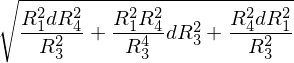

In [6]:
fouten

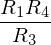

In [7]:
display(Rx)

# Berekenen van R_X

In [8]:
# Invoeren gemeten waarden weerstanden ALS ARRAYS!! (niet lijsten!)

waardenR1 = np.array([1*10**3, 10*10**3, 10*10**3, 1*10**3, 1*10**3, 10*10**3, 1*10**3], dtype = np.float64)
waardenR3 = np.array([1*10**3, 1*10**3,  1*10**3,  1*10**3, 1*10**3, 1*10**3,  1*10**3], dtype = np.float64)
waardenR4 = np.array([396, 248, 206, 151, 626, 156, 760], dtype = np.float64)

onzekerhedenR1 = np.array([2, 20, 20, 2, 2, 20, 2], dtype = np.float64)
onzekerhedenR3 = np.array([2, 2, 2, 2, 2, 2, 2], dtype = np.float64)
onzekerhedenR4 = np.array([5, 3, 3, 3, 7, 3, 9], dtype = np.float64)

In [9]:
# Berekenen van de Rx-en

waardenRx = waardenR1*waardenR4/waardenR3


In [10]:
display(waardenRx)
# Komen overeen met de waarden die Basten heeft opgeschreven

array([ 396., 2480., 2060.,  151.,  626., 1560.,  760.])

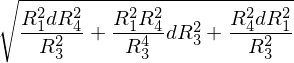

In [11]:
fouten

# Berekenen fouten op R_x

In [12]:
fouten_num = sp.lambdify((R1, R3, R4, dR1, dR3, dR4), fouten, 'numpy')

In [13]:
onzekerhedenRx = fouten_num(waardenR1, waardenR3, waardenR4, onzekerhedenR1, onzekerhedenR3, onzekerhedenR4)

In [14]:
onzekerhedenRx

array([ 5.12391725, 30.8091415 , 30.56057591,  3.03024883,  7.2204576 ,
       30.32274394,  9.25315081])

# Hypothesetest doen

In [15]:
# Voer de theoretisch bepaalde waarden in

theoretischeRx = np.array([390, 2400, 2000, 150, 620, 1500, 750], dtype = np.float64)
onzekerhedenthRx =  np.array([4, 24, 20, 2, 31, 30, 38], dtype = np.float64)

# Omdat de gegeven onzekerheden op theoretische Rx systematische fouten zijn:

onzekerhedenthRx = (1/np.sqrt(12))*onzekerhedenthRx

In [16]:
onzekerhedenthRx

array([ 1.15470054,  6.92820323,  5.77350269,  0.57735027,  8.94892917,
        8.66025404, 10.96965511])

In [17]:
# We volgen nu slides les 3 vanaf slide 9 (stappenplan)

sigma_tot = np.sqrt(onzekerhedenthRx**2 + onzekerhedenRx**2)
x = np.abs(waardenRx - theoretischeRx)/sigma_tot

In [18]:
x

array([1.14233171, 2.53336727, 1.92918851, 0.32417438, 0.52180159,
       1.90263582, 0.69681059])

In [19]:
import scipy.stats as nst

In [20]:
# Indien normale verdeling:

p_waarde = 2*(1-nst.norm.cdf(x))
# nst.norm.cdf(x) bepaalt de kans dat X < x[i], dus omdat tweezijdige toets 2*(1-...)

In [21]:
# P-waarden uit de hypothesetest
p_waarde

array([0.25331616, 0.01129725, 0.05370746, 0.74580602, 0.60180848,
       0.05708808, 0.48592134])